Se importan las librerías para obtener información de BigQuery

In [1]:
from google.cloud import bigquery
import seaborn as sns
import pandas

# objeto Client
client = bigquery.Client()

# Referencia al Dataset chicago_crime
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - traer el dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


Listamos las tablas en el dataset

In [2]:
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

crime


Listamos las columnas en la tabla Crime

In [3]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("crime")

# API request - fetch the table
table = client.get_table(table_ref)
table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('x_coord

In [4]:
client.list_rows(table, max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,25850,JE190772,2021-04-06 01:55:00+00:00,105XX S MARYLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9.0,50.0,01A,1183774.0,1835238.0,2021,2022-08-31 04:51:30+00:00,41.703073,-87.602673,"(41.703073446, -87.602673084)"
1,24071,JB359746,2018-07-21 11:31:00+00:00,002XX W 106TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34.0,49.0,01A,1176557.0,1834650.0,2018,2022-09-18 04:45:51+00:00,41.701625,-87.629118,"(41.701624878, -87.629117507)"
2,3351,HL619154,2005-09-18 01:13:00+00:00,103XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1176784.0,1836170.0,2005,2022-08-31 04:51:30+00:00,41.705791,-87.628241,"(41.705790877, -87.628240739)"
3,23029,HZ554936,2016-12-17 01:25:00+00:00,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,34.0,49.0,01A,1177249.0,1835331.0,2016,2022-09-18 04:45:51+00:00,41.703478,-87.626563,"(41.703478083, -87.626563168)"
4,1618,HH510318,2002-07-15 05:00:00+00:00,106XX S LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,NaN,NaN,01A,1177156.0,1834531.0,2002,2022-08-31 04:51:30+00:00,41.701285,-87.626928,"(41.701284863, -87.626927742)"


Podemos acceder a distintas columnas por número de col

In [5]:
client.list_rows(table, selected_fields=table.schema[:22], max_results=5).to_dataframe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  """Entry point for launching an IPython kernel.


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,25850,JE190772,2021-04-06 01:55:00+00:00,105XX S MARYLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9.0,50.0,01A,1183774.0,1835238.0,2021,2022-08-31 04:51:30+00:00,41.703073,-87.602673,"(41.703073446, -87.602673084)"
1,24071,JB359746,2018-07-21 11:31:00+00:00,002XX W 106TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34.0,49.0,01A,1176557.0,1834650.0,2018,2022-09-18 04:45:51+00:00,41.701625,-87.629118,"(41.701624878, -87.629117507)"
2,3351,HL619154,2005-09-18 01:13:00+00:00,103XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1176784.0,1836170.0,2005,2022-08-31 04:51:30+00:00,41.705791,-87.628241,"(41.705790877, -87.628240739)"
3,23029,HZ554936,2016-12-17 01:25:00+00:00,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,34.0,49.0,01A,1177249.0,1835331.0,2016,2022-09-18 04:45:51+00:00,41.703478,-87.626563,"(41.703478083, -87.626563168)"
4,1618,HH510318,2002-07-15 05:00:00+00:00,106XX S LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,NaN,NaN,01A,1177156.0,1834531.0,2002,2022-08-31 04:51:30+00:00,41.701285,-87.626928,"(41.701284863, -87.626927742)"


In [6]:
query = """
        SELECT primary_type, description, arrest, year
        FROM `bigquery-public-data.chicago_crime.crime`
        """
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))
query_job = client.query(query)
crimes = query_job.to_dataframe().head()
crimes.head()

This query will process 299481596 bytes.


/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,primary_type,description,arrest,year
0,HOMICIDE,FIRST DEGREE MURDER,True,2005
1,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,True,2001
2,ROBBERY,ARMED: OTHER FIREARM,False,2008
3,ROBBERY,VEHICULAR HIJACKING,False,2005
4,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,False,2013


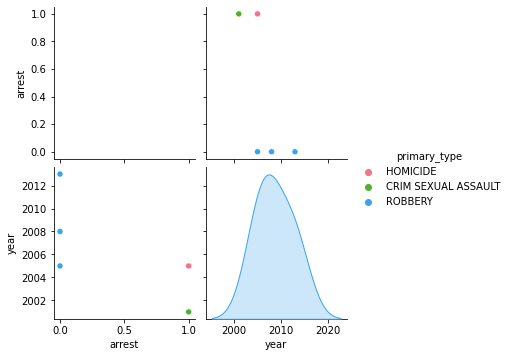

In [7]:
 g = sns.pairplot(crimes, hue="primary_type", palette="husl")
